## Poker Hand Ranking, level: expert

In [1]:
# link: https://edabit.com/challenge/C6pHyc4iN6BNzmhsM

#In this challenge, you have to establish which kind of Poker combination is present in a deck of five cards. Every card is a string containing the card value (with the upper-case initial for face-cards) and the lower-case initial for suits, as in the examples below:

#"Ah" ➞ Ace of hearts
#"Ks" ➞ King of spades
#"3d" ➞ Three of diamonds
#"Qc" ➞ Queen of clubs
#There are 10 different combinations. Here's the list, in decreasing order of importance:

#Name	Description
#Royal Flush	A, K, Q, J, 10, all with the same suit.
#Straight Flush	Five cards in sequence, all with the same suit.
#Four of a Kind	Four cards of the same rank.
#Full House	Three of a Kind with a Pair.
#Flush	Any five cards of the same suit, not in sequence.
#Straight	Five cards in a sequence, but not of the same suit.
#Three of a Kind	Three cards of the same rank.
#Two Pair	Two different Pair.
#Pair	Two cards of the same rank.
#High Card	No other valid combination.
#Given a list hand containing five strings being the cards, implement a function that returns a string with the name of the highest combination obtained, accordingly to the table above.

#Examples
#poker_hand_ranking(["10h", "Jh", "Qh", "Ah", "Kh"]) ➞ "Royal Flush"

#poker_hand_ranking(["3h", "5h", "Qs", "9h", "Ad"]) ➞ "High Card"

#poker_hand_ranking(["10s", "10c", "8d", "10d", "10h"]) ➞ "Four of a Kind"

In [2]:
# Deck creation

numbers = ["2","3","4","5","6","7","8","9","10"]
figures = ["J", "Q", "K","a"] 
kinds = ["h","s","d","c"]
global deck
deck = []

for number in numbers:
    for kind in kinds:
        deck.append(number+kind)
        
for figure in figures:
    for kind in kinds:
        deck.append(figure+kind)
        
print(deck)
print(len(deck))

['2h', '2s', '2d', '2c', '3h', '3s', '3d', '3c', '4h', '4s', '4d', '4c', '5h', '5s', '5d', '5c', '6h', '6s', '6d', '6c', '7h', '7s', '7d', '7c', '8h', '8s', '8d', '8c', '9h', '9s', '9d', '9c', '10h', '10s', '10d', '10c', 'Jh', 'Js', 'Jd', 'Jc', 'Qh', 'Qs', 'Qd', 'Qc', 'Kh', 'Ks', 'Kd', 'Kc', 'ah', 'as', 'ad', 'ac']
52


In [3]:
# Create the dictionary of rankings

global numbers_hands 
numbers_hands = {
    
     '[4, 1]':"Poker",
     '[3, 2]':"Full House",
     '[3, 1, 1]':"Three of a Kind",
     '[2, 2, 1]':"Two Pair",
     '[2, 1, 1, 1]':"Pair",
     '[1, 1, 1, 1, 1]':"High Card"}

global rankings
rankings = {
    
    "Royal Flush":10,
    "Straigth Flush":9,
    "Poker":8,
    "Full House":7,
    "Flush":6,
    "Straigth":5,
    "Three of a Kind":4,
    "Two Pair":3,
    "Pair":2,
    "High Card":1}

global inverse_rankings
inverse_rankings = {
    
    10:"Royal Flush",
    9:"Straigth Flush",
    8:"Poker",
    7:"Full House",
    6:"Flush",
    5:"Straigth",
    4:"Three of a Kind",
    3:"Two Pair",
    2:"Pair",
    1:"High Card"}


In [4]:
def get_best_game():
    
    import random
    
    global deck 
    random.shuffle(deck)
    hand = random.sample(deck, 5)
    #hand = ['10h', 'Jh','Qs', 'ah','Kh']
    first_char = [i[:-1] for i in hand]
    unique_char =  list(dict.fromkeys(first_char))
    dict_hand = {}
    list_of_all_results_names = []
    list_of_all_results_values = []

    #ROYAL RUSH

    Royal_rush_values_order = ['10', 'J', 'Q', 'K', 'a']

    if first_char[0] in Royal_rush_values_order and first_char[1] in Royal_rush_values_order and first_char[2] in Royal_rush_values_order and first_char[3] in Royal_rush_values_order and first_char[4] in Royal_rush_values_order:
        if len(set([i[-1:] for i in hand])) == 1:
            result = "Royal Flush"
            list_of_all_results_names.append(result)
            list_of_all_results_values.append(rankings[result])
        else:
            pass

    #STRAIGHT FLUSH AND STRAIGHT

    dict_values = {'a':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'10':10,'J':11,'Q':12,'K':13}

    values = []

    for i in first_char:
        values.append(dict_values[i])

    values = sorted(values)
    diff = [int(values[i]) - values[i-1] for i in range(1,5)]
    average = sum(diff)/len(diff)

        #STRAIGHT FLUSH

    if average == 1.0 and len(set([i[-1:] for i in hand])) == 1:
        result = "Straigth Flush"
        list_of_all_results_names.append(result)
        list_of_all_results_values.append(rankings[result])
    else:
        pass

        #STRAIGHT

    if first_char[0] in Royal_rush_values_order and first_char[1] in Royal_rush_values_order and first_char[2] in Royal_rush_values_order and first_char[3] in Royal_rush_values_order and first_char[4] in Royal_rush_values_order:
        if len(set([i[-1:] for i in hand])) != 1 and len(unique_char) == 5 and len(set(diff)) == 1:
            result = "Straigth"
            list_of_all_results_names.append(result)
            list_of_all_results_values.append(rankings[result])
        else:
            pass

    elif average == 1.0 and len(set([i[-1:] for i in hand])) != 1 and len(set(diff)) == 1:
        result = "Straigth"
        list_of_all_results_names.append(result)
        list_of_all_results_values.append(rankings[result])
    else:
        pass

    #FLUSH

    if len(set([i[-1:] for i in hand])) == 1:
        result = "Flush"
        list_of_all_results_names.append(result)
        list_of_all_results_values.append(rankings[result])
    else:
        pass

    #REST OF POSIBILITIES

    for i in unique_char:
        dict_hand.update({i: first_char.count(i)})
    result = str(sorted(list(dict_hand.values()),reverse= True))
    list_of_all_results_names.append(numbers_hands[result])
    list_of_all_results_values.append(rankings[numbers_hands[result]])

    # GET THE BEST POSSIBLE GAME

    best_game = inverse_rankings[max(list_of_all_results_values)]
    return (hand, best_game)

    

In [12]:
for i in range(1,100000):
    a = get_best_game()
    if a[1] == "Straigth Flush":
        print(a)
    else:
        pass

   

(['7s', '3s', '6s', '5s', '4s'], 'Straigth Flush')
(['5c', '7c', '6c', '4c', '8c'], 'Straigth Flush')


{'High Card', 'Straigth', 'Pair', 'Straigth Flush', 'Full House', 'Poker', 'Three of a Kind', 'Flush', 'Two Pair'}


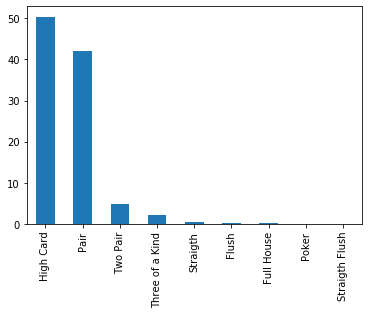

In [11]:
def get_results_chart(iterations):
    
    import pandas as pd
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    list_of_poker_results = []
    a = 0
    
    while a <= iterations:
        list_of_poker_results.append(get_best_game()[1]) 
        a += 1
    
    games_df = pd.DataFrame({"Game": list_of_poker_results})
    print(set(list_of_poker_results))
    dist_games = games_df["Game"].value_counts()/len(games_df["Game"])*100
    return dist_games.plot(kind = "bar")
    


get_results_chart(100000)

In [431]:
## ERRORS DETECTION

error = ['Js', 'Jd', '3s', 'Ks', 'ac']
first_char_error = [i[:-1] for i in error]
values_error = []
dict_values_error = {'a':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'10':10,'J':11,'Q':12,'K':13}
for i in first_char_error:
        values_error.append(dict_values_error[i])
values_error = sorted(values_error)
diff_error = [int(values_error[i]) - values_error[i-1] for i in range(1,5)]
print(values_error)
print(diff_error)
print(set(diff_error), len(set(diff_error)))

[1, 3, 11, 11, 13]
[2, 8, 0, 2]
{8, 0, 2} 3
